# p22: 5'th eigenvector of Airy equation

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import *
from numpy import dot,diag,real,argsort,zeros,linspace,polyval,polyfit,where
from scipy.linalg import eig
from scipy.special import airy
from matplotlib.pyplot import figure,subplot,plot,title

/Users/praveen/Applications/anaconda/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


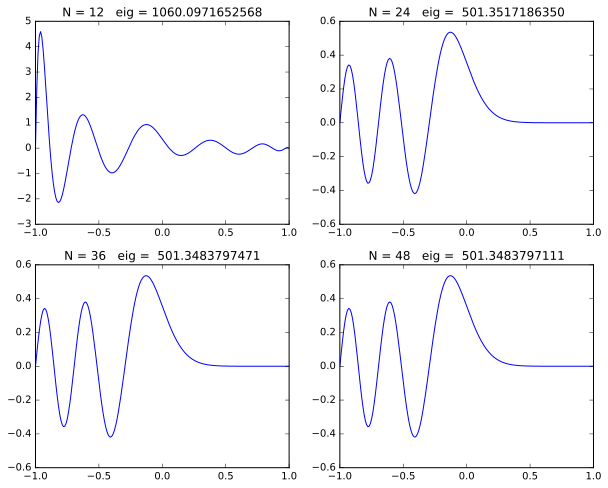

In [9]:
figure(figsize=(10,8))
for N in range(12,60,12):
    D,x = cheb(N); D2 = dot(D,D); D2 = D2[1:N,1:N]
    Lam,V = eig(D2,diag(x[1:N]))
    Lam = real(Lam); ii = where(Lam>0)[0]
    V = real(V[:,ii]); Lam = Lam[ii]
    ii = argsort(Lam); ii=ii[4]; Lam=Lam[ii]
    v = zeros(N+1); v[1:N] = V[:,ii]; v = v/v[N/2]*airy(0.0)[0]
    xx = linspace(-1.0,1.0,200); vv = polyval(polyfit(x,v,N),xx);
    subplot(2,2,N/12); plot(xx,vv)
    title("N = %d   eig = %15.10f"%(N,Lam));